# Interactive notebook to display the effect of pointing or impact point

In [1]:
import pschitt.emission as em
import pschitt.vizualisation as viz
import pschitt.sky_objects as sky
import pschitt.geometry as geo
import pschitt.camera_image as ci
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
%matplotlib inline

### Setting up

In [19]:
shower = sky.shower()

shower.impact_point = np.array([50,0,0])

#shower direction
shower.alt = math.radians(50)
shower.az = math.radians(0)

#pointing direction off-axis
talt = math.radians(50)
taz = math.radians(0)

#shower parameters
shower_top = 12000
shower_length = 8000
shower_width = 200

shower.number_of_particles = int(4e4)

shower.gaussian_ellipsoide(shower_top, shower_length, shower_width)

tel_normal = geo.altaz_to_normal(talt,taz)
tel1 = geo.Telescope([0,0,0],tel_normal)
tel2 = geo.Telescope([200,0,0],tel_normal)
tel3 = geo.Telescope([400,0,0],tel_normal)
tel4 = geo.Telescope([800,0,0],tel_normal)
tel5 = geo.Telescope([0,400,0],tel_normal)

alltel = [tel1, tel2, tel3, tel4, tel5]

trigger_intensity = 20.
noise = 0

shower.particles_angular_emission_profile = em.angular_profile.lgdt06
shower.particles_angular_emission_profile_kwargs = {'eta':0.01}

ci.array_shower_imaging(shower, alltel, noise)

In [20]:
# alltel = geo.load_telescopes('../share/arrays/CTA_paranal.txt', normal=geo.altaz_to_normal(talt, taz))

### Site Map

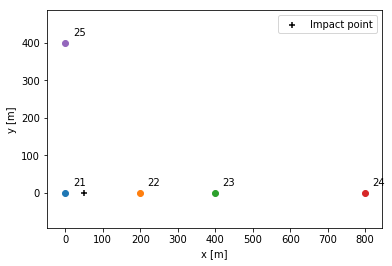

In [21]:
ax = viz.plot_array(alltel)
ax.scatter(shower.impact_point[0], shower.impact_point[1], color='black', label='Impact point', marker="+")
ax.legend()

In [22]:
from ipywidgets import interact, interactive, fixed, interact_manual, widgets

In [24]:
@interact(i=1)
def f(i):
    fig, ax = plt.subplots()
    ax = viz.display_camera_image(alltel[i], s=10, ax=ax);
    return ax

interactive(children=(IntSlider(value=1, description='i', max=3, min=-1), Output()), _dom_classes=('widget-int…

## Effect of altitude

In [28]:
shower_dict = {}
alltel = []

altitude = [65,67,70,72,75]
for alt in altitude:
    shower = sky.shower()

    shower.impact_point = np.array([50,0,0])

    #shower direction
    shower.alt = math.radians(alt)
    shower.az = math.radians(0)

    #pointing direction off-axis
    talt = math.radians(70)
    taz = math.radians(0)

    #shower parameters
    shower_top = 12000
    shower_length = 8000
    shower_width = 100

    shower.number_of_particles = int(1e4)

    shower.gaussian_ellipsoide(shower_top, shower_length, shower_width)

    tel_normal = geo.altaz_to_normal(talt,taz)
    tel = geo.Telescope([400,0,0], tel_normal)

    trigger_intensity = 20.
    noise = 0

    shower.particles_angular_emission_profile = em.angular_profile.lgdt06
    shower.particles_angular_emission_profile_kwargs = {'eta':0.1}

    ci.array_shower_imaging(shower, [tel], noise)
    
    alltel.append(tel)

    
    
@interact(i=widgets.IntSlider(min=0,max=len(alltel)-1,step=1,value=0))
def f(i): 
    ax = viz.display_camera_image(alltel[i], s=10);
    ax.set_title("Shower altitude = {}".format(altitude[i]));

interactive(children=(IntSlider(value=0, description='i', max=4), Output()), _dom_classes=('widget-interact',)…

## Effect of shower azimuth

In [33]:
shower_dict = {}
alltel = []

azimuth = [65,67,70,72,75]
for az in azimuth:
    shower = sky.shower()

    shower.impact_point = np.array([50,0,0])

    #shower direction
    shower.alt = math.radians(-40)
    shower.az = math.radians(az)

    #pointing direction off-axis
    talt = math.radians(-40)
    taz = math.radians(70)

    #shower parameters
    shower_top = 12000
    shower_length = 8000
    shower_width = 100

    shower.number_of_particles = int(5e4)

    shower.gaussian_ellipsoide(shower_top, shower_length, shower_width)

    tel_normal = geo.altaz_to_normal(talt,taz)
    tel = geo.Telescope([400,0,0], tel_normal)

    trigger_intensity = 20.
    noise = 0

    shower.particles_angular_emission_profile = em.angular_profile.lgdt06
    shower.particles_angular_emission_profile_kwargs = {'eta':0.1}

    ci.array_shower_imaging(shower, [tel], noise)
    
    alltel.append(tel)


@interact(i=widgets.IntSlider(min=0,max=len(alltel)-1,step=1,value=0))
def f(i):
    ax = viz.display_camera_image(alltel[i], s=10);
    ax.set_title("Shower azimuth = {}".format(azimuth[i]))

interactive(children=(IntSlider(value=0, description='i', max=4), Output()), _dom_classes=('widget-interact',)…

## Effect of impact point

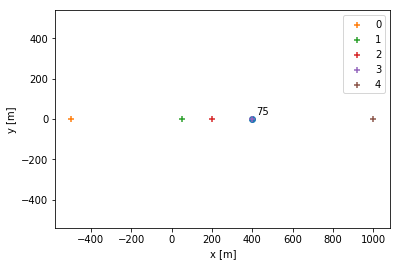

interactive(children=(IntSlider(value=0, description='i', max=4), Output()), _dom_classes=('widget-interact',)…

In [34]:
shower_dict = {}
alltel = []

impact_x = [-500,50,200,400,1000]
for x in impact_x:
    shower = sky.shower()

    shower.impact_point = np.array([x,0,0])

    #shower direction
    shower.alt = math.radians(40)
    shower.az = math.radians(70)

    #pointing direction off-axis
    talt = math.radians(40)
    taz = math.radians(70)

    #shower parameters
    shower_top = 12000
    shower_length = 8000
    shower_width = 100

    shower.number_of_particles = int(4e4)

    shower.gaussian_ellipsoide(shower_top, shower_length, shower_width)

    tel_normal = geo.altaz_to_normal(talt,taz)
    tel = geo.Telescope([400,0,0], tel_normal)

    trigger_intensity = 20.
    noise = 0

    shower.particles_angular_emission_profile = em.angular_profile.lgdt06
    shower.particles_angular_emission_profile_kwargs = {'eta':0.1}

    ci.array_shower_imaging(shower, [tel], noise)
    
    alltel.append(tel)
    
ax = viz.plot_array([tel])
for i, x in enumerate(impact_x):
    ax.scatter(x, 0, label=i, marker='+')
ax.legend()

@interact(i=widgets.IntSlider(min=0,max=len(alltel)-1,step=1,value=0))
def f(i):
    ax = viz.display_camera_image(alltel[i], s=10);
    ax.set_title("Impact point X value = {}".format(impact_x[i]))

## Effect of impact point Y-value

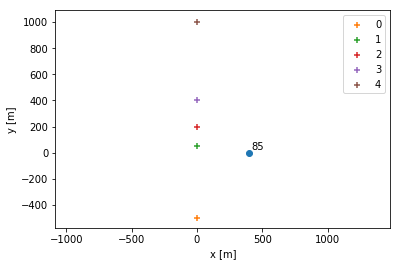

interactive(children=(IntSlider(value=0, description='i', max=4), Output()), _dom_classes=('widget-interact',)…

In [36]:
shower_dict = {}
alltel = []

impact_y = [-500,50,200,400,1000]
for y in impact_y:
    shower = sky.shower()

    shower.impact_point = np.array([200,y,0])

    #shower direction
    shower.alt = math.radians(50)
    shower.az = math.radians(0)

    #pointing direction off-axis
    talt = math.radians(50)
    taz = math.radians(0)

    #shower parameters
    shower_top = 12000
    shower_length = 8000
    shower_width = 100

    shower.number_of_particles = int(4e4)

    shower.gaussian_ellipsoide(shower_top, shower_length, shower_width)

    tel_normal = geo.altaz_to_normal(talt,taz)
    tel = geo.Telescope([400,0,0], tel_normal)

    trigger_intensity = 20.
    noise = 0

    shower.particles_angular_emission_profile = em.angular_profile.lgdt06
    shower.particles_angular_emission_profile_kwargs = {'eta':0.1}

    ci.array_shower_imaging(shower, [tel], noise)
    
    alltel.append(tel)

ax = viz.plot_array([tel])
for i, y in enumerate(impact_y):
    ax.scatter(0, y, label=i, marker='+')
ax.legend()
@interact(i=widgets.IntSlider(min=0,max=len(alltel)-1,step=1,value=0))
def f(i):
    ax = viz.display_camera_image(alltel[i], s=12);
    ax.set_title("Impact point X value = {}".format(impact_x[i]))